In [1]:
# getting data from newyork times api using api key

import requests
API_KEY = "AtAGyakN6a5gAjJ2PZ5ya5wV3RufesA0" 

list_name = "combined-print-and-e-book-fiction"
url = f"https://api.nytimes.com/svc/books/v3/lists/current/{list_name}.json?api-key={API_KEY}"

response = requests.get(url)

if response.status_code == 200:
    data = response.json() 
    books = data['results']['books']
    
    # Loop through the list of books and print the info i need
    for book in books:
        title = book['title']
        author = book['author']
        weeks_on_list = book['weeks_on_list']
        print(f"'{title}' by {author}. On list for {weeks_on_list} weeks.")
else:
    print("Error: Could not get data from NYT API. Status Code:", response.status_code)

'FRAMED IN DEATH' by J.D. Robb. On list for 1 weeks.
'THE HALLMARKED MAN' by Robert Galbraith. On list for 1 weeks.
'KATABASIS' by R.F. Kuang. On list for 2 weeks.
'THE SURROGATE MOTHER' by Freida McFadden. On list for 3 weeks.
'BILLION-DOLLAR RANSOM' by James Patterson and Duane Swierczynski. On list for 1 weeks.
'BUCKEYE' by Patrick Ryan. On list for 1 weeks.
'WILD REVERENCE' by Rebecca Ross. On list for 1 weeks.
'APOSTLE'S COVE' by William Kent Krueger. On list for 1 weeks.
'TOM CLANCY: TERMINAL VELOCITY' by M.P. Woodward. On list for 1 weeks.
'THE THURSDAY MURDER CLUB' by Richard Osman. On list for 2 weeks.
'QUICKSILVER' by Callie Hart. On list for 11 weeks.
'PROJECT HAIL MARY' by Andy Weir. On list for 21 weeks.
'DEADLY STORMS' by Christine Feehan. On list for 1 weeks.
'THE COLOR OF DEATH' by Trey Gowdy with Christopher Greyson. On list for 2 weeks.
'LEAVE ME BEHIND' by K.M. Moronova. On list for 1 weeks.


In [ ]:
# importing pandas library, creating table header
# appending the data collected from the api to the header and saving it on a csv file

import pandas as pd

df = pd.DataFrame(books)[["title", "author", "weeks_on_list"]]
df.to_csv("LongetivityOfBestsellers01.csv", index=False)
print(df)

In [14]:
pd.read_csv(r"C:\Users\NNAMDI\Pictures\LongetivityOfBestsellers01.csv")

,title,author,weeks_on_list
0,KATABASIS,R.F. Kuang,1
1,THE SURROGATE MOTHER,Freida McFadden,2
2,THE COLOR OF DEATH,Trey Gowdy with Christopher Greyson,1
3,QUICKSILVER,Callie Hart,10
4,ATMOSPHERE,Taylor Jenkins Reid,13
5,PROJECT HAIL MARY,Andy Weir,20
6,THE THURSDAY MURDER CLUB,Richard Osman,1
7,THE NIGHTINGALE,Kristin Hannah,87
8,MY FRIENDS,Fredrik Backman,12
9,REMARKABLY BRIGHT CREATURES,Shelby Van Pelt,15


In [25]:
# importing nesseccary libraries

from bs4 import BeautifulSoup
import requests
import textstat

In [75]:
# getting data from the url

url = "https://www.goodreads.com/book/show/40893132-the-surrogate-mother?ref=nav_sb_ss_1_20"
page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")

In [117]:
# extracting and cleaning the data i need from the first book

Title_1 = soup.find(class_ = "Text Text__title1").text.strip()
Author_1 = soup.find(class_ = "ContributorLink__name").text.strip()
Text_source_1 = "About the Book"
AboutAuthor_1 = soup.find(class_ = "Formatted").text.strip()

'The Surrogate Mother'

In [145]:
# calculating the reading ease and from what grade should be able to read it

Reading_Ease_Score_1 = textstat.flesch_reading_ease(AboutAuthor_1)
Grade_level_1 = textstat.flesch_kincaid_grade(AboutAuthor_1)

In [237]:
# creating headers, appending the data to the header and  storing it in a csv file

header = ["Title", "Author","Text_Source", "Reading_Ease_Score", "Grade_level"]
data1 = [Title_1,Author_1,Text_source_1,Reading_Ease_Score_1,Grade_level_1]

with open ('ReadabilityOfBestsellers.csv','w',newline = '',encoding = "UTF8") as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data1)

In [238]:
pd.read_csv(r"ReadabilityOfBestsellers.csv")

,Title,Author,Text_Source,Reading_Ease_Score,Grade_level
0,The Surrogate Mother,Freida McFadden,About the Book,67.013293,6.822474


In [148]:
# getting data from the url

url_2 = "https://www.goodreads.com/book/show/210223811-katabasis?from_search=true&from_srp=true&qid=Gwl1xdT25c&rank=1"
page_2 = requests.get(url_2)
soup_2 = BeautifulSoup(page_2.text, "html.parser")

In [139]:
# extracting and cleaning the data i need from the second book

Title_2 = soup_2.find(class_ = "Text Text__title1").text.strip()
Author_2 = soup_2.find(class_ = "ContributorLink__name").text.strip()
Text_source_2 = "About the Book"
AboutAuthor_2 = soup_2.find(class_ = "Formatted").text.strip()

In [143]:
# calculating the reading ease and from what grade should be able to read it

Reading_Ease_Score_2 = textstat.flesch_reading_ease(AboutAuthor_2)
Grade_level_2 = textstat.flesch_kincaid_grade(AboutAuthor_2)

In [240]:
# appending the data to the table and  storing it in a csv file

data2 = [Title_2,Author_2,Text_source_2,Reading_Ease_Score_2,Grade_level_2]

with open ('ReadabilityOfBestsellers.csv','a+',newline = '',encoding = "UTF8") as f:
    writer = csv.writer(f)
    writer.writerow(data2)

In [241]:
pd.read_csv(r"ReadabilityOfBestsellers.csv")

,Title,Author,Text_Source,Reading_Ease_Score,Grade_level
0,The Surrogate Mother,Freida McFadden,About the Book,67.013293,6.822474
1,Katabasis,R.F. Kuang,About the Book,62.453846,9.623297


In [152]:
# getting data from from the url

url_3 = "https://www.goodreads.com/book/show/227967143-the-color-of-death?ref=nav_sb_ss_2_18"
page_3 = requests.get(url_3)
soup_3 = BeautifulSoup(page_3.text, "html.parser")

In [153]:
# extracting and cleaning the data i need from the third book

Title_3 = soup_3.find(class_ = "Text Text__title1").text.strip()
Author_3 = soup_3.find(class_ = "ContributorLink__name").text.strip()
Text_source_3 = "About the Book"
AboutAuthor_3 = soup_3.find(class_ = "Formatted").text.strip()

In [154]:
# calculating the reading ease and from what grade should be able to read it

Reading_Ease_Score_3 = textstat.flesch_reading_ease(AboutAuthor_3)
Grade_level_3 = textstat.flesch_kincaid_grade(AboutAuthor_3)

In [242]:
# appending the data to the table and  storing it in a csv file

data3 = [Title_3,Author_3,Text_source_3,Reading_Ease_Score_3,Grade_level_3]

with open ('ReadabilityOfBestsellers.csv','a+',newline = '',encoding = "UTF8") as f:
    writer = csv.writer(f)
    writer.writerow(data3)

In [243]:
pd.read_csv(r"ReadabilityOfBestsellers.csv")

,Title,Author,Text_Source,Reading_Ease_Score,Grade_level
0,The Surrogate Mother,Freida McFadden,About the Book,67.013293,6.822474
1,Katabasis,R.F. Kuang,About the Book,62.453846,9.623297
2,The Color of Death,Trey Gowdy,About the Book,51.515000,13.030000


In [159]:
# getting data from from the url

url_4 = "https://www.goodreads.com/book/show/217536270-quicksilver?ref=nav_sb_ss_1_11"
page_4 = requests.get(url_4)
soup_4 = BeautifulSoup(page_4.text, "html.parser")

In [160]:
# extracting and cleaning the data i need from the fourth book

Title_4 = soup_4.find(class_ = "Text Text__title1").text.strip()
Author_4 = soup_4.find(class_ = "ContributorLink__name").text.strip()
Text_source_4 = "About the Book"
AboutAuthor_4 = soup_4.find(class_ = "Formatted").text.strip()

In [161]:
# calculating the reading ease and from what grade should be able to read it

Reading_Ease_Score_4 = textstat.flesch_reading_ease(AboutAuthor_4)
Grade_level_4 = textstat.flesch_kincaid_grade(AboutAuthor_4)

In [244]:
# appending the data to the table and  storing it in a csv file

data4 = [Title_4,Author_4,Text_source_4,Reading_Ease_Score_4,Grade_level_4]

with open ('ReadabilityOfBestsellers.csv','a+',newline = '',encoding = "UTF8") as f:
    writer = csv.writer(f)
    writer.writerow(data4)

In [245]:
pd.read_csv(r"ReadabilityOfBestsellers.csv")

,Title,Author,Text_Source,Reading_Ease_Score,Grade_level
0,The Surrogate Mother,Freida McFadden,About the Book,67.013293,6.822474
1,Katabasis,R.F. Kuang,About the Book,62.453846,9.623297
2,The Color of Death,Trey Gowdy,About the Book,51.515000,13.030000
3,Quicksilver,Callie Hart,About the Book,78.659062,5.448523


In [165]:
# getting data from from the url

url_5 = "https://www.goodreads.com/book/show/220817728-atmosphere?ref=nav_sb_ss_1_10"
page_5 = requests.get(url_5)
soup_5 = BeautifulSoup(page_5.text, "html.parser")

In [166]:
# extracting and cleaning the data i need from the fifth book

Title_5 = soup_5.find(class_ = "Text Text__title1").text.strip()
Author_5 = soup_5.find(class_ = "ContributorLink__name").text.strip()
Text_source_5 = "About the Book"
AboutAuthor_5 = soup_5.find(class_ = "Formatted").text.strip()

In [167]:
# calculating the reading ease and from what grade should be able to read it

Reading_Ease_Score_5 = textstat.flesch_reading_ease(AboutAuthor_5)
Grade_level_5 = textstat.flesch_kincaid_grade(AboutAuthor_5)

In [246]:
# appending the data to the table and  storing it in a csv file

data5 = [Title_5,Author_5,Text_source_5,Reading_Ease_Score_5,Grade_level_5]

with open ('ReadabilityOfBestsellers.csv','a+',newline = '',encoding = "UTF8") as f:
    writer = csv.writer(f)
    writer.writerow(data5)

In [247]:
pd.read_csv(r"ReadabilityOfBestsellers.csv")

,Title,Author,Text_Source,Reading_Ease_Score,Grade_level
0,The Surrogate Mother,Freida McFadden,About the Book,67.013293,6.822474
1,Katabasis,R.F. Kuang,About the Book,62.453846,9.623297
2,The Color of Death,Trey Gowdy,About the Book,51.515000,13.030000
3,Quicksilver,Callie Hart,About the Book,78.659062,5.448523
4,Atmosphere,Taylor Jenkins Reid,About the Book,42.962673,14.278084


In [175]:
# getting data from from the url

url_6 = "https://www.goodreads.com/book/show/54493401-project-hail-mary?ref=nav_sb_ss_1_17"
page_6 = requests.get(url_6)
soup_6 = BeautifulSoup(page_6.text, "html.parser")

In [176]:
# extracting and cleaning the data i need from the sixth book

Title_6 = soup_6.find(class_ = "Text Text__title1").text.strip()
Author_6 = soup_6.find(class_ = "ContributorLink__name").text.strip()
Text_source_6 = "About the Book"
AboutAuthor_6 = soup_6.find(class_ = "Formatted").text.strip()

In [177]:
# calculating the reading ease and from what grade should be able to read it

Reading_Ease_Score_6 = textstat.flesch_reading_ease(AboutAuthor_6)
Grade_level_6 = textstat.flesch_kincaid_grade(AboutAuthor_6)

In [248]:
# appending the data to the table and  storing it in a csv file

data6 = [Title_6,Author_6,Text_source_6,Reading_Ease_Score_6,Grade_level_6]

with open ('ReadabilityOfBestsellers.csv','a+',newline = '',encoding = "UTF8") as f:
    writer = csv.writer(f)
    writer.writerow(data6)

In [249]:
pd.read_csv(r"ReadabilityOfBestsellers.csv")

,Title,Author,Text_Source,Reading_Ease_Score,Grade_level
0,The Surrogate Mother,Freida McFadden,About the Book,67.013293,6.822474
1,Katabasis,R.F. Kuang,About the Book,62.453846,9.623297
2,The Color of Death,Trey Gowdy,About the Book,51.515000,13.030000
3,Quicksilver,Callie Hart,About the Book,78.659062,5.448523
4,Atmosphere,Taylor Jenkins Reid,About the Book,42.962673,14.278084
5,Project Hail Mary,Andy Weir,About the Book,64.427500,7.378333


In [217]:
url_7 = "https://www.goodreads.com/book/show/46000520-the-thursday-murder-club?from_search=true&from_srp=true&qid=UMUB4HI0s3&rank=1"
page_7 = requests.get(url_7)
soup_7 = BeautifulSoup(page_7.text, "html.parser")

In [218]:
# extracting and cleaning the data i need from the seventh book

Title_7 = soup_7.find(class_ = "Text Text__title1").text.strip()
Author_7 = soup_7.find(class_ = "ContributorLink__name").text.strip()
Text_source_7 = "About the Book"
AboutAuthor_7 = soup_7.find(class_ = "Formatted").text.strip()

In [219]:
# calculating the reading ease and from what grade should be able to read it

Reading_Ease_Score_7 = textstat.flesch_reading_ease(AboutAuthor_7)
Grade_level_7 = textstat.flesch_kincaid_grade(AboutAuthor_7)

In [250]:
# appending the data to the table and  storing it in a csv file

data7 = [Title_7,Author_7,Text_source_7,Reading_Ease_Score_7,Grade_level_7]

with open ('ReadabilityOfBestsellers.csv','a+',newline = '',encoding = "UTF8") as f:
    writer = csv.writer(f)
    writer.writerow(data7)

In [252]:
pd.read_csv(r"ReadabilityOfBestsellers.csv")

,Title,Author,Text_Source,Reading_Ease_Score,Grade_level
0,The Surrogate Mother,Freida McFadden,About the Book,67.013293,6.822474
1,Katabasis,R.F. Kuang,About the Book,62.453846,9.623297
2,The Color of Death,Trey Gowdy,About the Book,51.515000,13.030000
3,Quicksilver,Callie Hart,About the Book,78.659062,5.448523
4,Atmosphere,Taylor Jenkins Reid,About the Book,42.962673,14.278084
5,Project Hail Mary,Andy Weir,About the Book,64.427500,7.378333
6,The Thursday Murder Club,Richard Osman,About the Book,60.847154,8.647846


In [222]:
url_8 = "https://www.goodreads.com/book/show/21853621-the-nightingale?ref=nav_sb_ss_1_15"
page_8 = requests.get(url_8)
soup_8 = BeautifulSoup(page_8.text, "html.parser")

In [223]:
# extracting and cleaning the data i need from the eighth book

Title_8 = soup_8.find(class_ = "Text Text__title1").text.strip()
Author_8 = soup_8.find(class_ = "ContributorLink__name").text.strip()
Text_source_8 = "About the Book"
AboutAuthor_8 = soup_8.find(class_ = "Formatted").text.strip()

In [224]:
# calculating the reading ease and from what grade should be able to read it

Reading_Ease_Score_8 = textstat.flesch_reading_ease(AboutAuthor_8)
Grade_level_8 = textstat.flesch_kincaid_grade(AboutAuthor_8)

In [253]:
# appending the data to the table and  storing it in a csv file

data8 = [Title_8,Author_8,Text_source_8,Reading_Ease_Score_8,Grade_level_8]

with open ('ReadabilityOfBestsellers.csv','a+',newline = '',encoding = "UTF8") as f:
    writer = csv.writer(f)
    writer.writerow(data8)

In [254]:
pd.read_csv(r"ReadabilityOfBestsellers.csv")

,Title,Author,Text_Source,Reading_Ease_Score,Grade_level
0,The Surrogate Mother,Freida McFadden,About the Book,67.013293,6.822474
1,Katabasis,R.F. Kuang,About the Book,62.453846,9.623297
2,The Color of Death,Trey Gowdy,About the Book,51.515000,13.030000
3,Quicksilver,Callie Hart,About the Book,78.659062,5.448523
4,Atmosphere,Taylor Jenkins Reid,About the Book,42.962673,14.278084
5,Project Hail Mary,Andy Weir,About the Book,64.427500,7.378333
6,The Thursday Murder Club,Richard Osman,About the Book,60.847154,8.647846
7,The Nightingale,Kristin Hannah,About the Book,51.524539,11.972851


In [227]:
url_9 = "https://www.goodreads.com/book/show/217163697-my-friends?ref=nav_sb_ss_1_10"
page_9 = requests.get(url_9)
soup_9 = BeautifulSoup(page_9.text, "html.parser")

In [228]:
# extracting and cleaning the data i need from the ninth book

Title_9 = soup_9.find(class_ = "Text Text__title1").text.strip()
Author_9 = soup_9.find(class_ = "ContributorLink__name").text.strip()
Text_source_9 = "About the Book"
AboutAuthor_9 = soup_9.find(class_ = "Formatted").text.strip()

In [229]:
# calculating the reading ease and from what grade should be able to read it

Reading_Ease_Score_9 = textstat.flesch_reading_ease(AboutAuthor_9)
Grade_level_9 = textstat.flesch_kincaid_grade(AboutAuthor_9)

In [255]:
# appending the data to the table and  storing it in a csv file

data9 = [Title_9,Author_9,Text_source_9,Reading_Ease_Score_9,Grade_level_9]

with open ('ReadabilityOfBestsellers.csv','a+',newline = '',encoding = "UTF8") as f:
    writer = csv.writer(f)
    writer.writerow(data9)

In [256]:
pd.read_csv(r"ReadabilityOfBestsellers.csv")

,Title,Author,Text_Source,Reading_Ease_Score,Grade_level
0,The Surrogate Mother,Freida McFadden,About the Book,67.013293,6.822474
1,Katabasis,R.F. Kuang,About the Book,62.453846,9.623297
2,The Color of Death,Trey Gowdy,About the Book,51.515000,13.030000
3,Quicksilver,Callie Hart,About the Book,78.659062,5.448523
4,Atmosphere,Taylor Jenkins Reid,About the Book,42.962673,14.278084
5,Project Hail Mary,Andy Weir,About the Book,64.427500,7.378333
6,The Thursday Murder Club,Richard Osman,About the Book,60.847154,8.647846
7,The Nightingale,Kristin Hannah,About the Book,51.524539,11.972851
8,My Friends,Fredrik Backman,About the Book,55.372000,11.548000


In [232]:
url_10 = "https://www.goodreads.com/book/show/58733693-remarkably-bright-creatures?ref=nav_sb_ss_1_27"
page_10 = requests.get(url_10)
soup_10 = BeautifulSoup(page_10.text, "html.parser")

In [233]:
# extracting and cleaning the data i need from the tenth book

Title_10 = soup_10.find(class_ = "Text Text__title1").text.strip()
Author_10 = soup_10.find(class_ = "ContributorLink__name").text.strip()
Text_source_10 = "About the Book"
AboutAuthor_10 = soup_10.find(class_ = "Formatted").text.strip()

In [234]:
# calculating the reading ease and from what grade should be able to read it

Reading_Ease_Score_10 = textstat.flesch_reading_ease(AboutAuthor_10)
Grade_level_10 = textstat.flesch_kincaid_grade(AboutAuthor_10)

In [257]:
# appending the data to the table and  storing it in a csv file

data10 = [Title_10,Author_10,Text_source_10,Reading_Ease_Score_10,Grade_level_10]

with open ('ReadabilityOfBestsellers.csv','a+',newline = '',encoding = "UTF8") as f:
    writer = csv.writer(f)
    writer.writerow(data10)

In [260]:
pd.read_csv(r"ReadabilityOfBestsellers.csv")

,Title,Author,Text_Source,Reading_Ease_Score,Grade_level
0,The Surrogate Mother,Freida McFadden,About the Book,67.013293,6.822474
1,Katabasis,R.F. Kuang,About the Book,62.453846,9.623297
2,The Color of Death,Trey Gowdy,About the Book,51.515000,13.030000
3,Quicksilver,Callie Hart,About the Book,78.659062,5.448523
4,Atmosphere,Taylor Jenkins Reid,About the Book,42.962673,14.278084
5,Project Hail Mary,Andy Weir,About the Book,64.427500,7.378333
6,The Thursday Murder Club,Richard Osman,About the Book,60.847154,8.647846
7,The Nightingale,Kristin Hannah,About the Book,51.524539,11.972851
8,My Friends,Fredrik Backman,About the Book,55.372000,11.548000
9,Remarkably Bright Creatures,Shelby Van Pelt,About the Book,41.723303,12.687803


In [261]:
url_11 = "https://www.goodreads.com/book/show/224108311-kiss-the-villain?ac=1&from_search=true&qid=xxWdrYHgdw&rank=1"
page_11 = requests.get(url_11)
soup_11 = BeautifulSoup(page_11.text, "html.parser")

In [262]:
# extracting and cleaning the data i need from the eleventh book

Title_11 = soup_11.find(class_ = "Text Text__title1").text.strip()
Author_11 = soup_11.find(class_ = "ContributorLink__name").text.strip()
Text_source_11 = "About the Book"
AboutAuthor_11 = soup_11.find(class_ = "Formatted").text.strip()

In [263]:
# calculating the reading ease and from what grade should be able to read it

Reading_Ease_Score_11 = textstat.flesch_reading_ease(AboutAuthor_11)
Grade_level_11 = textstat.flesch_kincaid_grade(AboutAuthor_11)

In [264]:
# appending the data to the table and  storing it in a csv file

data11 = [Title_11,Author_11,Text_source_11,Reading_Ease_Score_11,Grade_level_11]

with open ('ReadabilityOfBestsellers.csv','a+',newline = '',encoding = "UTF8") as f:
    writer = csv.writer(f)
    writer.writerow(data11)

In [265]:
pd.read_csv(r"ReadabilityOfBestsellers.csv")

,Title,Author,Text_Source,Reading_Ease_Score,Grade_level
0,The Surrogate Mother,Freida McFadden,About the Book,67.013293,6.822474
1,Katabasis,R.F. Kuang,About the Book,62.453846,9.623297
2,The Color of Death,Trey Gowdy,About the Book,51.515000,13.030000
3,Quicksilver,Callie Hart,About the Book,78.659062,5.448523
4,Atmosphere,Taylor Jenkins Reid,About the Book,42.962673,14.278084
5,Project Hail Mary,Andy Weir,About the Book,64.427500,7.378333
6,The Thursday Murder Club,Richard Osman,About the Book,60.847154,8.647846
7,The Nightingale,Kristin Hannah,About the Book,51.524539,11.972851
8,My Friends,Fredrik Backman,About the Book,55.372000,11.548000
9,Remarkably Bright Creatures,Shelby Van Pelt,About the Book,41.723303,12.687803


In [266]:
url_12 = "https://www.goodreads.com/book/show/214151202-broken-country?ref=nav_sb_ss_1_14"
page_12 = requests.get(url_12)
soup_12 = BeautifulSoup(page_12.text, "html.parser")

In [267]:
# extracting and cleaning the data i need from the twelveth book

Title_12 = soup_12.find(class_ = "Text Text__title1").text.strip()
Author_12 = soup_12.find(class_ = "ContributorLink__name").text.strip()
Text_source_12 = "About the Book"
AboutAuthor_12 = soup_12.find(class_ = "Formatted").text.strip()

In [268]:
# calculating the reading ease and from what grade should be able to read it

Reading_Ease_Score_12 = textstat.flesch_reading_ease(AboutAuthor_12)
Grade_level_12 = textstat.flesch_kincaid_grade(AboutAuthor_12)

In [269]:
# appending the data to the table and  storing it in a csv file

data12 = [Title_12,Author_12,Text_source_12,Reading_Ease_Score_12,Grade_level_12]

with open ('ReadabilityOfBestsellers.csv','a+',newline = '',encoding = "UTF8") as f:
    writer = csv.writer(f)
    writer.writerow(data12)

In [270]:
pd.read_csv(r"ReadabilityOfBestsellers.csv")

,Title,Author,Text_Source,Reading_Ease_Score,Grade_level
0,The Surrogate Mother,Freida McFadden,About the Book,67.013293,6.822474
1,Katabasis,R.F. Kuang,About the Book,62.453846,9.623297
2,The Color of Death,Trey Gowdy,About the Book,51.515000,13.030000
3,Quicksilver,Callie Hart,About the Book,78.659062,5.448523
4,Atmosphere,Taylor Jenkins Reid,About the Book,42.962673,14.278084
5,Project Hail Mary,Andy Weir,About the Book,64.427500,7.378333
6,The Thursday Murder Club,Richard Osman,About the Book,60.847154,8.647846
7,The Nightingale,Kristin Hannah,About the Book,51.524539,11.972851
8,My Friends,Fredrik Backman,About the Book,55.372000,11.548000
9,Remarkably Bright Creatures,Shelby Van Pelt,About the Book,41.723303,12.687803


In [271]:
url_13 = "https://www.goodreads.com/book/show/209559869-pucking-strong?ref=nav_sb_ss_1_14"
page_13 = requests.get(url_13)
soup_13 = BeautifulSoup(page_13.text, "html.parser")

In [272]:
# extracting and cleaning the data i need from the thirteenth book

Title_13 = soup_13.find(class_ = "Text Text__title1").text.strip()
Author_13 = soup_13.find(class_ = "ContributorLink__name").text.strip()
Text_source_13 = "About the Book"
AboutAuthor_13 = soup_13.find(class_ = "Formatted").text.strip()

In [273]:
# calculating the reading ease and from what grade should be able to read it

Reading_Ease_Score_13 = textstat.flesch_reading_ease(AboutAuthor_13)
Grade_level_13 = textstat.flesch_kincaid_grade(AboutAuthor_13)

In [274]:
# appending the data to the table and  storing it in a csv file

data13 = [Title_13,Author_13,Text_source_13,Reading_Ease_Score_13,Grade_level_13]

with open ('ReadabilityOfBestsellers.csv','a+',newline = '',encoding = "UTF8") as f:
    writer = csv.writer(f)
    writer.writerow(data13)

In [275]:
pd.read_csv(r"ReadabilityOfBestsellers.csv")

,Title,Author,Text_Source,Reading_Ease_Score,Grade_level
0,The Surrogate Mother,Freida McFadden,About the Book,67.013293,6.822474
1,Katabasis,R.F. Kuang,About the Book,62.453846,9.623297
2,The Color of Death,Trey Gowdy,About the Book,51.515000,13.030000
3,Quicksilver,Callie Hart,About the Book,78.659062,5.448523
4,Atmosphere,Taylor Jenkins Reid,About the Book,42.962673,14.278084
5,Project Hail Mary,Andy Weir,About the Book,64.427500,7.378333
6,The Thursday Murder Club,Richard Osman,About the Book,60.847154,8.647846
7,The Nightingale,Kristin Hannah,About the Book,51.524539,11.972851
8,My Friends,Fredrik Backman,About the Book,55.372000,11.548000
9,Remarkably Bright Creatures,Shelby Van Pelt,About the Book,41.723303,12.687803


In [276]:
url_14 = "https://www.goodreads.com/book/show/209439446-onyx-storm?ref=nav_sb_ss_1_10"
page_14 = requests.get(url_14)
soup_14 = BeautifulSoup(page_14.text, "html.parser")

In [277]:
# extracting and cleaning the data i need from the fourteenth book

Title_14 = soup_14.find(class_ = "Text Text__title1").text.strip()
Author_14 = soup_14.find(class_ = "ContributorLink__name").text.strip()
Text_source_14 = "About the Book"
AboutAuthor_14 = soup_14.find(class_ = "Formatted").text.strip()

In [278]:
# calculating the reading ease and from what grade should be able to read it

Reading_Ease_Score_14 = textstat.flesch_reading_ease(AboutAuthor_14)
Grade_level_14 = textstat.flesch_kincaid_grade(AboutAuthor_14)

In [279]:
# appending the data to the table and  storing it in a csv file

data14 = [Title_14,Author_14,Text_source_14,Reading_Ease_Score_14,Grade_level_14]

with open ('ReadabilityOfBestsellers.csv','a+',newline = '',encoding = "UTF8") as f:
    writer = csv.writer(f)
    writer.writerow(data14)

In [280]:
pd.read_csv(r"ReadabilityOfBestsellers.csv")

,Title,Author,Text_Source,Reading_Ease_Score,Grade_level
0,The Surrogate Mother,Freida McFadden,About the Book,67.013293,6.822474
1,Katabasis,R.F. Kuang,About the Book,62.453846,9.623297
2,The Color of Death,Trey Gowdy,About the Book,51.515000,13.030000
3,Quicksilver,Callie Hart,About the Book,78.659062,5.448523
4,Atmosphere,Taylor Jenkins Reid,About the Book,42.962673,14.278084
5,Project Hail Mary,Andy Weir,About the Book,64.427500,7.378333
6,The Thursday Murder Club,Richard Osman,About the Book,60.847154,8.647846
7,The Nightingale,Kristin Hannah,About the Book,51.524539,11.972851
8,My Friends,Fredrik Backman,About the Book,55.372000,11.548000
9,Remarkably Bright Creatures,Shelby Van Pelt,About the Book,41.723303,12.687803


In [281]:
url_15 = "https://www.goodreads.com/book/show/58778536-do-not-disturb?ref=nav_sb_ss_1_14"
page_15 = requests.get(url_15)
soup_15 = BeautifulSoup(page_15.text, "html.parser")

In [282]:
# extracting and cleaning the data i need from the fifteenth book

Title_15 = soup_15.find(class_ = "Text Text__title1").text.strip()
Author_15 = soup_15.find(class_ = "ContributorLink__name").text.strip()
Text_source_15 = "About the Book"
AboutAuthor_15 = soup_15.find(class_ = "Formatted").text.strip()

In [283]:
# calculating the reading ease and from what grade should be able to read it

Reading_Ease_Score_15 = textstat.flesch_reading_ease(AboutAuthor_15)
Grade_level_15 = textstat.flesch_kincaid_grade(AboutAuthor_15)

In [284]:
# appending the data to the table and  storing it in a csv file

data15 = [Title_15,Author_15,Text_source_15,Reading_Ease_Score_15,Grade_level_15]

with open ('ReadabilityOfBestsellers.csv','a+',newline = '',encoding = "UTF8") as f:
    writer = csv.writer(f)
    writer.writerow(data15)

In [6]:
import pandas as pd
df = pd.read_csv(r"C:\Users\NNAMDI\Pictures\ReadabilityOfBestsellers.csv")
df

,Title,Author,Text_Source,Reading_Ease_Score,Grade_level
0,The Surrogate Mother,Freida McFadden,About the Book,67.013293,6.822474
1,Katabasis,R.F. Kuang,About the Book,62.453846,9.623297
2,The Color of Death,Trey Gowdy,About the Book,51.515000,13.030000
3,Quicksilver,Callie Hart,About the Book,78.659062,5.448523
4,Atmosphere,Taylor Jenkins Reid,About the Book,42.962673,14.278084
5,Project Hail Mary,Andy Weir,About the Book,64.427500,7.378333
6,The Thursday Murder Club,Richard Osman,About the Book,60.847154,8.647846
7,The Nightingale,Kristin Hannah,About the Book,51.524539,11.972851
8,My Friends,Fredrik Backman,About the Book,55.372000,11.548000
9,Remarkably Bright Creatures,Shelby Van Pelt,About the Book,41.723303,12.687803


In [7]:
df1 = pd.read_csv(r"C:\Users\NNAMDI\Pictures\LongetivityOfBestsellers01.csv")
df1

,title,author,weeks_on_list
0,KATABASIS,R.F. Kuang,1
1,THE SURROGATE MOTHER,Freida McFadden,2
2,THE COLOR OF DEATH,Trey Gowdy with Christopher Greyson,1
3,QUICKSILVER,Callie Hart,10
4,ATMOSPHERE,Taylor Jenkins Reid,13
5,PROJECT HAIL MARY,Andy Weir,20
6,THE THURSDAY MURDER CLUB,Richard Osman,1
7,THE NIGHTINGALE,Kristin Hannah,87
8,MY FRIENDS,Fredrik Backman,12
9,REMARKABLY BRIGHT CREATURES,Shelby Van Pelt,15


In [21]:
# calculating the correlation between the book's readability score and the week on the bestseller list

df['Reading_Ease_Score'].corr(df1['weeks_on_list'])

np.float64(-0.24735798062107137)

In [22]:
# calculating the correlation between the book's grade level score and the week on the bestseller list

df['Grade_level'].corr(df1['weeks_on_list'])

np.float64(0.24529493053101412)

In [9]:
combined_df = pd.concat([df,df1])

In [8]:
# importing seaborn and matplotlib for visualization

import seaborn as sns
import matplotlib.pyplot as plt

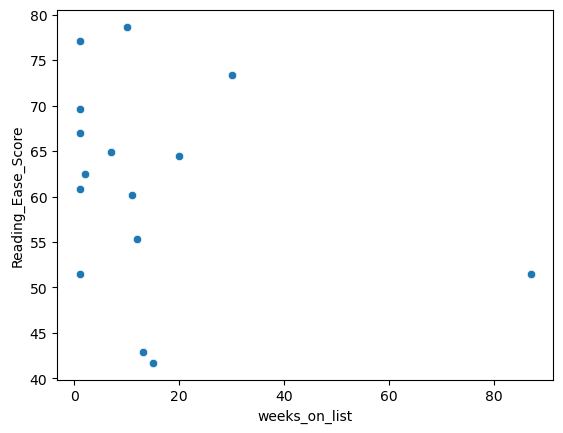

In [17]:
# using scatterplot to check if there are any visible pattern or relationship between a book's readability score and how long it stays on the bestseller list

sns.scatterplot(data = combined_df, x = "weeks_on_list", y = "Reading_Ease_Score")
plt.show()